### 학습 내용
---
- 비지도학습(Unsupervised Learning)에 대하여
- 비지도학습의 기본적인 개념에 대해 살펴봅니다.
- 3-4. 클러스터링
- (1) K-means
- (2) DBSCAN
- 5-6. 차원 축소
- (1) PCA
- (2) T-SNE

### 학습 목표
---
그동안 우리가 주로 배워온 딥러닝 모델들이 주로 수행하는 작업들은 대부분 무언가(X)를 분류하는 것들이었습니다. 이러한 분류 작업들을 위해서는 반드시 정답(y)으로 제시되는 분류 기준이 필요합니다. 이렇게 정답 데이터를 통해 X가 무엇인지 분류하는 방법을 배우게 하는 학습 방법을 지도학습(Supervised Learning)이라고 합니다. 그러나 명확한 정답 데이터가 라벨(label)로 달려있지 않은 수많은 데이터들을 우리는 어떻게 다룰 수 있을까요? 그리고 그 데이터들로부터 어떤 정보를 얻어낼 수 있을까요?

오늘은 비지도학습(Unsupervised Learning)에 대해서 알아보겠습니다. 비지도학습의 개념, 지도학습과 비지도학습의 차이, 주요 비지도학습 알고리즘에 대해 학습합니다.

## 6-2. 비지도학습(Unsupervised Learning)에 대하여

비지도학습(Unsupervised learning)이란, 지도학습과 달리 training data로 정답(label)이 없는 데이터가 주어지는 학습방법을 말합니다.
다르게 말하면, 비지도학습은 주어진 데이터가 어떻게 구성되어 있는지 스스로 알아내는 방법이라고도 말할 수 있습니다. 아무도 정답을 알려주지 않은 채 오로지 데이터셋의 특징(feature) 및 패턴을 기반으로 모델 스스로가 판단하는 것이니까요.

지도학습의 대표적인 예인 분류(classification) 문제를 살펴볼까요? 우리는 해당 사진이 강아지인지 고양이인지 판단하는 신경망 분류 모델을 학습하려고 합니다. 그렇게 하기 위해서는 이에 적합한 딥러닝 모델과 훈련에 필요한 training dataset이 필요한데, 강아지 및 고양이의 사진과 각각의 사진들이 이것은 '강아지'이다, '고양이'이다 라고 표시한 label이 필요해요.



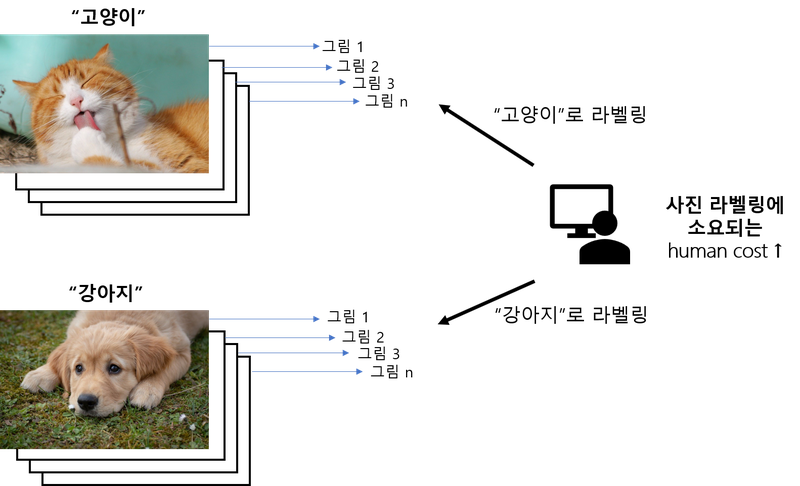

이렇게 모든 데이터셋에 각각에 대한 정보가 명시되어 있으면 좋겠지만, 그렇지 않은 경우가 대부분일뿐더러 라벨링이 되어 있는 데이터셋을 마련하기 위해서는 적지 않은 인적 자원이 소모된답니다. 결국 어떤 이미지가 고양이 사진이다, 강아지 사진이다라는 정답을 매기는 과정은 인간이 수행해야 하니까요.

이 문제를 해결하기 위해, 라벨링이 되어 있지 않은 데이터들 내에서 비슷한 특징이나 패턴을 가진 데이터들끼리 군집화한 후, 새로운 데이터가 어떤 군집에 속하는지를 추론하는 비지도학습과 같은 방법론이 제시되었어요.

비지도학습의 대표적인 예시로는 군집화(클러스터링, clustering) 가 있지만, 비지도학습이라는 용어는 정답이 주어지지 않은 데이터를 이용한 학습 전체를 포괄하는 용어이기 때문에 클러스터링 외에도 차원 축소(dimensionality reduction) 및 이를 이용한 데이터 시각화, 생성 모델(generative model) 등 다양한 task를 포괄하는 개념입니다.

이번 노드에서는 클러스터링의 대표적인 알고리즘인 K-means와 DBSCAN 알고리즘, 차원 축소의 대표적인 방법인 PCA(Principal Component Analysis), T-SNE에 대해서 다뤄볼까 해요.

### 6-3. 클러스터링(1) K-means

지도학습 상황과 달리, 비지도학습이 필요한 상황에서는 지도학습 때 당연히 주어지던 몇 가지가 생략되어 있습니다. 우선은 데이터 X가 무엇인지에 대한 정답(label) y가 없습니다. 또 없는 게 있다면, y가 될 수 있는 분류 기준(클래스 또는 카테고리)도 없다고 할 수 있겠네요.

군집화(클러스터링)이란 그렇게 명확한 분류 기준이 없는 상황에서도 데이터들을 분석하여 가까운(또는 유사한) 것들끼리 묶어 주는 작업입니다. 이를 통해서 개별적인 데이터들을 몇 개의 그룹으로 추상화하여 새로운 의미를 발견해 나갈 수 있게 되겠죠. 그런데 명확한 분류 기준이 없다면 무엇을 기준으로 묶어낼 수 있을까요? 가장 쉽게 생각해 볼 수 있는 방법은 임의로 k개의 그룹으로 뭉쳐 보라고 하는 것이겠군요. 단 아무렇게나 뭉치진 말고 k개의 기준점을 중심으로 가장 가까운 데이터들을 뭉쳐 보는 방식으로요.

K-means 알고리즘은 k 값이 주어져 있을 때, 주어진 데이터들을 k 개의 클러스터로 묶는 알고리즘으로 대표적인 클러스터링 기법 중 하나입니다. 다음 예제 코드를 통해 K-means 알고리즘이 어떻게 동작하는지 살펴봅시다.

#### 1. 데이터 생성
---
우선 모듈을 import하고 5개의 중심점을 기준으로 무작위 점 데이터 100개를 생성해 줍니다.

In [1]:
%matplotlib inline
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

# 중심점이 5개인 100개의 점 데이터를 무작위로 생성합니다.
points, labels = make_blobs(n_samples=100, centers=5, n_features=2, random_state=135)

print(points.shape, points[:10])  # 무작위로 생성된 점의 좌표 10개 출력
print(labels.shape, labels[:10])    # 10개의 점들이 각각 대응하는 중심점(label) 값 출력

(100, 2) [[ 4.63411914 -6.52590383]
 [-6.52008604  7.16624288]
 [ 2.14142339 -5.21092623]
 [ 1.70054231  8.54077897]
 [-0.33809159  8.76509668]
 [-7.69329744  7.94546313]
 [ 3.89090121 -3.06531839]
 [ 3.22338498 -2.93209009]
 [-6.63962964  5.34777334]
 [ 6.37904965 -6.46617328]]
(100,) [2 1 0 3 3 1 0 0 1 2]


,X,Y
0,4.634119,-6.525904
1,-6.520086,7.166243
2,2.141423,-5.210926
3,1.700542,8.540779
4,-0.338092,8.765097


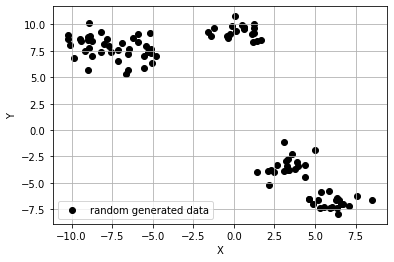

In [2]:
# 축 그리기
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 위에서 생성한 점 데이터들을 pandas DataFrame 형태로 변환하기
points_df = pd.DataFrame(points, columns=['X', 'Y'])
display(points_df.head())

# 점 데이터를 X-Y grid에 시각화하기
ax.scatter(points[:, 0], points[:, 1], c='black', label='random generated data')

# 축 이름을 라벨에 달고, 점 데이터 그리기
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

위와 같이 scikit-learn의 make_blob()을 활용하여 중심점이 5개인 무작위의 점 데이터 100개를 생성해 보았습니다. 한눈에 보기에도 위의 데이터들은 5개의 군집을 이루고 있는 것처럼 보이는데요, 과연 k-means 알고리즘을 적용하여 위 데이터들을 올바르게 군집화할 수 있는지 알아봅시다.

#### 2. 생성한 데이터에 K-means 알고리즘 적용
---
이제 K-means 알고리즘을 적용해 봅시다. 그런데, 데이터들끼리의 거리를 어떻게 측정하는 걸까요?

실은 우리는 위에서 자연스럽게 데이터를 X-Y 좌표축 위에 생성했습니다. 좌표축 위에 존재하는 데이터들 사이의 거리는 쉽게 계산해 낼 수 있죠? 피타고라스 정리를 응용하여 계산한 좌표축 사이의 두 점 사이의 직선거리를 유클리드 거리(Euclidian distance) 또는 L2 Distance라고 부릅니다. 자세한 설명은 아래 링크를 참고해 주세요.  
    - 군집 분석 (Cluster Analysis) https://modulabs.co.kr/blog/cluster-analysis-clustering-grouping
    
전체적인 K-mean 알고리즘의 순서는 다음과 같이 구성됩니다.

K-mean 알고리즘의 순서

1. 원하는 클러스터의 수(K)를 결정합니다.
2. 무작위로 클러스터의 수와 같은 K개의 중심점(centroid)을 선정합니다. 이들은 각각의 클러스터를 대표합니다.
3. 나머지 점들과 모든 중심점 간의 유클리드 거리를 계산한 후, 가장 가까운 거리를 가지는 중심점의 클러스터에 속하도록 합니다.
4. 각 K개의 클러스터의 중심점을 재조정합니다. 특정 클러스터에 속하는 모든 점들의 평균값이 해당 클러스터 다음 iteration의 중심점이 됩니다.(이 중심점은 실제로 존재하는 데이터가 아니어도 상관없습니다.)
5. 재조정된 중심점을 바탕으로 모든 점들과 새로 조정된 중심점 간의 유클리드 거리를 다시 계산한 후, 가장 가까운 거리를 가지는 클러스터에 해당 점을 재배정합니다.
6. 4.번과 5.번을 반복 수행합니다. 반복의 횟수는 사용자가 적절히 조절하면 되고, 특정 iteration 이상이 되면 수렴(중심점이 더 이상 바뀌지 않음)하게 됩니다.  

위 과정을 다음 코드와 함께 차례차례 확인해 봅시다.

In [3]:
from sklearn.cluster import KMeans

# 1), 2) 위에서 생성한 무작위 점 데이터(points)에 클러스터의 수(K)가 5인 K-means 알고리즘을 적용 
kmeans_cluster = KMeans(n_clusters=2)

# 3) ~ 6) 과정이 전부 함축되어 있는 코드입니다. points에 대하여 K가 5일 때의 K-means iteration을 수행
kmeans_cluster.fit(points)

print(type(kmeans_cluster.labels_))
print(np.shape(kmeans_cluster.labels_))
print(np.unique(kmeans_cluster.labels_))

<class 'numpy.ndarray'>
(100,)
[0 1]


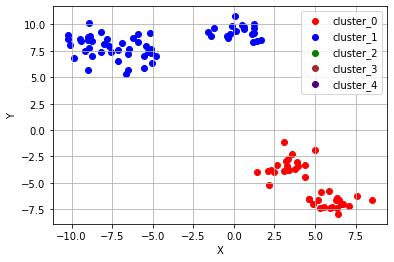

In [4]:
# n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary
color_dict = {0: 'red', 1: 'blue', 2:'green', 3:'brown', 4:'indigo'} 

# 점 데이터를 X-Y grid에 시각화합니다.
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# K-means clustering의 결과대로 색깔별로 구분하여 점에 색칠한 후 도식
for cluster in range(5):
    cluster_sub_points = points[kmeans_cluster.labels_ == cluster] # 전체 무작위 점 데이터에서 K-means 알고리즘에 의해 군집화된 sub data를 분리합니다. 
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster)) # 해당 sub data를 plot합니다.

# 축 이름을 라벨에 달고, 점 데이터 그리기
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

어떤가요? 처음에 우리가 중심점 5개인 무작위 데이터를 생성하고 나서, 이를 K-means 알고리즘을 활용해 5개의 군집으로 분류한 결과가 위와 같습니다. 우리가 처음에 예상했던 것처럼 5개의 그룹이 잘 분리된 것으로 보아 K-means 알고리즘은 군집의 수만 주어진다면, 데이터의 군집화를 매우 잘 수행한다는 것을 확인할 수 있어요. 그런데 사실, K-means 알고리즘이 항상 만능열쇠는 아닙니다. 주어진 데이터의 분포에 따라 우리가 의도하지 않은 결과를 초래할 수 있어요.

Q. 위 KMeans 코드의 K 값을 다른 값(ex. 3, 2 등)으로 설정해서 클러스터링이 잘 되는지 확인해보세요.
2개로 했을 경우 위에서 1,4 가 하나의 class, 나머지가 다른 하나의 class 로 클러스터링 됩니다. 

## 3. K-means 알고리즘이 잘 동작하지 않는 예시들
---
다음 코드를 통해 어떤 특성의 데이터들이 K-means 알고리즘을 적용하였을 때 잘 군집화되지 않는지 살펴보도록 해요.

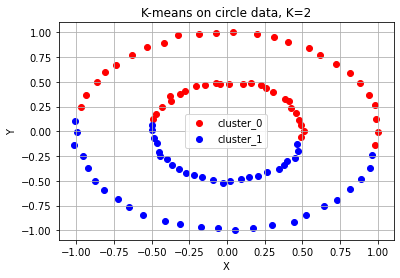

In [5]:
# K-means algorithm이 잘 동작하지 않는 예시 (1) 원형 분포
from sklearn.datasets import make_circles

# 원형 분포 데이터 생성
circle_points, circle_labels = make_circles(n_samples=100, factor=0.5, noise=0.01) # 원형 분포를 가지는 점 데이터 100개를 생성합니다.

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 원형 분포에 대해 K-means 수행
circle_kmeans = KMeans(n_clusters=2)
circle_kmeans.fit(circle_points)
color_dict = {0: 'red', 1: 'blue'}
for cluster in range(2):
    cluster_sub_points = circle_points[circle_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on circle data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()

첫 번째 원형으로 분포되어 있는 데이터 같은 경우는 아마 대부분의 사람들이 '가운데 작은 원'과 '바깥쪽 큰 원' 두 개의 군집으로 분류하기를 원했을 거예요. 하지만 K-means 알고리즘은 이 데이터들을 마치 케잌을 칼로 자르듯이 반으로 나눴네요.

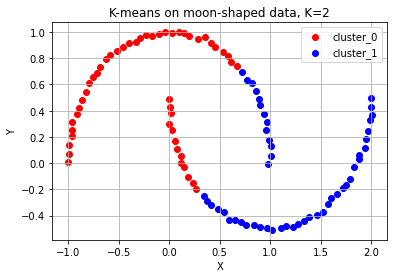

In [6]:
# K-means algorithm이 잘 동작하지 않는 예시 (2) 달 모양 분포
from sklearn.datasets import make_moons

# 달 모양 분포의 데이터 생성
moon_points, moon_labels = make_moons(n_samples=100, noise=0.01) # 달 모양 분포를 가지는 점 데이터 100개를 생성합니다.

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 달 모양 분포 데이터 plot
moon_kmeans = KMeans(n_clusters=2)
moon_kmeans.fit(moon_points)
color_dict = {0: 'red', 1: 'blue'}
for cluster in range(2):
    cluster_sub_points = moon_points[moon_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on moon-shaped data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()

두 번째 초승달 모양의 데이터도 마찬가지예요. 두 개의 달 형태를 분리해서 군집화하지 않고, 이 역시 y축에 대하여 칼로 자른 형태의 느낌으로 두 개의 군집을 나눴네요.

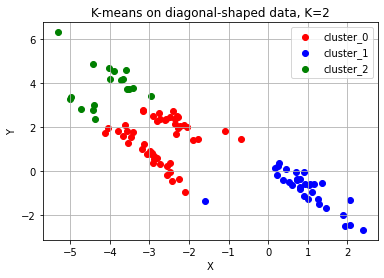

In [7]:
# K-means algorithm이 잘 동작하지 않는 예시 (3) 대각선 모양 분포
from sklearn.datasets import make_circles, make_moons, make_blobs

# 대각선 모양 분포의 데이터 생성
diag_points, _ = make_blobs(n_samples=100, random_state=170) #대각선 분포를 가지는 점 데이터 100개를 생성합니다.(현재는 무작위 분포)
transformation = [[0.6, -0.6], [-0.4, 0.8]] #대각선 변환을 위한 대각 행렬
diag_points = np.dot(diag_points, transformation) #본 과정을 통해 무작위 분포의 점 데이터를 대각선 분포로 변환합니다.

# 캔버스 생성
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# 대각선 모양 분포 데이터 plot
diag_kmeans = KMeans(n_clusters=3)
diag_kmeans.fit(diag_points)
color_dict = {0: 'red', 1: 'blue', 2: 'green'}
for cluster in range(3):
    cluster_sub_points = diag_points[diag_kmeans.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('K-means on diagonal-shaped data, K=2')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend() 
ax.grid()

마지막으로 크게 3개의 대각선 방향으로 나열되어 있는 데이터들 역시 예상대로 군집을 이루지 않습니다.

이러한 예시를 통해, K-means 알고리즘은 다음과 같은 상황에서는 적합하지 않은 군집화 알고리즘이라는 것을 알 수 있어요.

군집의 개수(K 값)를 미리 지정해야 하기 때문에 이를 알거나 예측하기 어려운 경우에는 사용하기 어렵다.
유클리드 거리가 가까운 데이터끼리 군집이 형성되기 때문에 데이터의 분포에 따라 유클리드 거리가 멀면서 밀접하게 연관되어 있는 데이터들의 군집화를 성공적으로 수행하지 못할 수 있다.
그렇다면 위의 경우처럼 군집의 개수를 명시하지 않으면서, 밀도 기반으로 군집을 예측하는 방법이 있을까요?

## 6-4. 클러스터링(2) DBSCAN

DBSCAN(Density Based Spatial Clustering of Applications with Noise) 알고리즘은 가장 널리 알려진 밀도(density) 기반의 군집 알고리즘입니다. K-means 알고리즘을 사용하여 해결하기 어려웠던 문제들을 DBSCAN 알고리즘을 활용해 해결할 수 있어요.
DBSCAN 알고리즘의 가장 큰 특징 중 하나는 군집의 개수, 즉 K-means 알고리즘에서의 K 값을 미리 지정할 필요가 없다는 점입니다. 또한 유클리드 거리 기반의 K-means 알고리즘 방식과 달리, 조밀하게 몰려 있는 클러스터를 군집화하는 방식을 사용하기 때문에 원 모양의 군집이 아닌 불특정한 형태의 군집도 찾을 수 있어요.

클러스터 중심점을 지정하지 않는다면 어떤 방식으로 클러스터링을 하는 걸까요? 우선 시각적으로 이해를 돕는 웹페이지를 소개하겠습니다.

DBSCAN - primo.ai https://primo.ai/index.php?title=Density-Based_Spatial_Clustering_of_Applications_with_Noise_(DBSCAN)

위 사이트를 보시면 왜 DBSCAN이 밀도 기반 군집 알고리즘인지 이해가 되실 것입니다. K-means 알고리즘과는 달리, 클러스터가 최초의 임의의 점 하나로부터 점점 퍼져나가는데 그 기준이 바로 일정 반경 안의 데이터의 개수, 즉 데이터의 밀도이기 때문입니다.

#### 1. DBSCAN 알고리즘의 동작
---
DBSCAN 알고리즘을 본격적으로 설명하기 전에 DBSCAN을 이해하는 데 필요한 변수와 용어 정리가 필요해요. 각각의 변수 및 용어에 대한 설명은 다음과 같아요.

- epsilon: 클러스터의 반경
- minPts: 클러스터를 이루는 개체의 최솟값
- core point: 반경 epsilon 내에 minPts 개 이상의 점이 존재하는 중심점
- border point: 군집의 중심이 되지는 못하지만, 군집에 속하는 점
- noise point: 군집에 포함되지 못하는 점
K-means에서 K 값을 미리 지정해야 했다면, DBSCAN에서는 epsilon과 minPts 값이 미리 지정해 주어야 하는 변수라는 것을 기억합시다!

DBSCAN 알고리즘은 다음과 같은 순서로 동작해요.

DBSCAN 알고리즘의 순서

1. 임의의 점 p를 설정하고, p를 포함하여 주어진 클러스터의 반경(elipson) 안에 포함되어 있는 점들의 개수를 세요.
2. 만일 해당 원에 minPts 개 이상의 점이 포함되어 있으면, 해당 점 p를 core point로 간주하고 원에 포함된 점들을 하나의 클러스터로 묶어요.
3. 해당 원에 minPts 개 미만의 점이 포함되어 있으면, 일단 pass 합시다.
4.모든 점에 대하여 돌아가면서 1~3 번의 과정을 반복하는데, 만일 새로운 점 p'가 core point가 되고 이 점이 기존의 클러스터(p를 core point로 하는)에 속한다면, 두 개의 클러스터는 연결되어 있다고 하며 하나의 클러스터로 묶어줘요.
5. 모든 점에 대하여 클러스터링 과정을 끝냈는데, 어떤 점을 중심으로 하더라도 클러스터에 속하지 못하는 점이 있으면 이를 noise point로 간주해요. 또한, 특정 군집에는 속하지만 core point가 아닌 점들을 border point라고 칭해요.

### 2. DBSCAN 알고리즘을 적용해보기
---
그럼 아래에서 scikit-learn을 활용해서 DBSCAN을 직접 체험해보도록 합시다. 이전 스텝에서 K-means로는 잘되지 않았던 예시들이 DBSCAN에서는 어떻게 처리되는지 흥미롭게 비교해 봅시다.

# of cluster: 2
DBSCAN Y-hat: [0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 1
 1 1 0 1 1 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1]


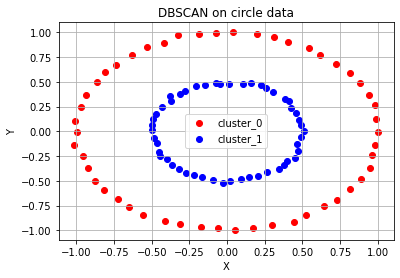

In [8]:
# DBSCAN으로 circle, moon, diagonal shaped data를 군집화한 결과
from sklearn.cluster import DBSCAN

fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary

# 원형 분포 데이터 plot
epsilon, minPts = 0.2, 3 # 2)와 3) 과정에서 사용할 epsilon, minPts 값을 설정
circle_dbscan = DBSCAN(eps=epsilon, min_samples=minPts) # 위에서 생성한 원형 분포 데이터에 DBSCAN setting
circle_dbscan.fit(circle_points) # 3) ~ 5) 과정을 반복
n_cluster = max(circle_dbscan.labels_)+1 # 3) ~5) 과정의 반복으로 클러스터의 수 도출

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {circle_dbscan.labels_}')

# DBSCAN 알고리즘의 수행결과로 도출된 클러스터의 수를 기반으로 색깔별로 구분하여 점에 색칠한 후 도식
for cluster in range(n_cluster):
    cluster_sub_points = circle_points[circle_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on circle data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

# of cluster: 2
DBSCAN Y-hat: [0 1 1 1 0 0 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 1 0
 0 0 1 1 1 0 0 0 0 1 1 0 0 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1]


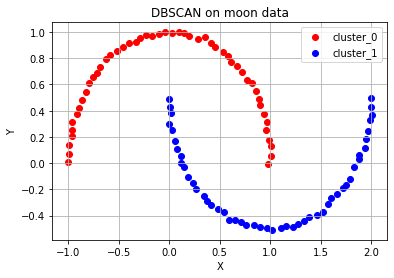

In [9]:
# 달 모양 분포 데이터 plot - 위와 같은 과정 반복
fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary

epsilon, minPts = 0.4, 3
moon_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
moon_dbscan.fit(moon_points)
n_cluster = max(moon_dbscan.labels_)+1

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {moon_dbscan.labels_}')

for cluster in range(n_cluster):
    cluster_sub_points = moon_points[moon_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on moon data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

# of cluster: 3
DBSCAN Y-hat: [ 0  1  1  0  0  2  2  0  1  2  2  2  0  2  0  1  2  2  2  1  1  1  1  1
  2  2  0  1  0  2  1  0  2  1  2  0  0  0  0  0  1  0  1  0  0  2  1  1
  0  2  1  1  2  1  0  2 -1  2  0  0  2  0  0  1  0  1  1  2  2  2 -1  0
  2  0  0  0  1  2  2 -1  2  2  1  2  0  0  2  1  1  2  1  1  2  0 -1  1
  0  0  0  1]


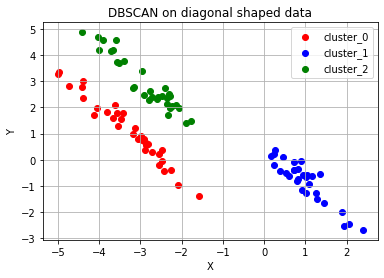

In [10]:
# 대각선 모양 분포 데이터 plot - 위와 같은 과정 반복
fig = plt.figure()
ax= fig.add_subplot(1, 1, 1)
color_dict = {0: 'red', 1: 'blue', 2: 'green', 3:'brown',4:'purple'} # n 번째 클러스터 데이터를 어떤 색으로 도식할 지 결정하는 color dictionary

epsilon, minPts = 0.7, 3
diag_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
diag_dbscan.fit(diag_points)
n_cluster = max(diag_dbscan.labels_)+1

print(f'# of cluster: {n_cluster}')
print(f'DBSCAN Y-hat: {diag_dbscan.labels_}')

for cluster in range(n_cluster):
    cluster_sub_points = diag_points[diag_dbscan.labels_ == cluster]
    ax.scatter(cluster_sub_points[:, 0], cluster_sub_points[:, 1], c=color_dict[cluster], label='cluster_{}'.format(cluster))
ax.set_title('DBSCAN on diagonal shaped data')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.legend()
ax.grid()

DBSCAN Y-hat 결과가 -1인 경우가 가끔 눈에 띄시나요? 어느 군집에도 포함되지 못한 noise point 가 존재한다는 것을 기억해 주세요.

위 코드에서 확인할 수 있듯이, epsilon과 minPts 값을 잘 조절해 주면 DBSCAN 알고리즘에 따라 클러스터의 수를 명시해 주지 않아도 적절한 클러스터의 개수를 설정하여 주어진 데이터에 대한 군집화를 수행할 수 있어요. 클러스터의 수를 지정해 주고, 데이터의 분포를 신경 써야 하는 K-means 알고리즘에 비해 훨씬 유연한 사용이 가능하기 때문에 DBSCAN은 굉장히 보편적으로 사용되는 군집화 알고리즘이에요.

그렇다면 모든 면에서 좋아보이는 DBSCAN의 단점은 없을까요?

## 3. DBSCAN 알고리즘과 K-means 알고리즘의 소요 시간 비교

# of samples: 100 / Elapsed time of K-means: 0.01863s / DBSCAN: 0.00171s
# of samples: 500 / Elapsed time of K-means: 0.01794s / DBSCAN: 0.00357s
# of samples: 1000 / Elapsed time of K-means: 0.05860s / DBSCAN: 0.00741s
# of samples: 2000 / Elapsed time of K-means: 0.02346s / DBSCAN: 0.03983s
# of samples: 5000 / Elapsed time of K-means: 0.21030s / DBSCAN: 0.13506s
# of samples: 7500 / Elapsed time of K-means: 0.09338s / DBSCAN: 0.20715s
# of samples: 10000 / Elapsed time of K-means: 0.25127s / DBSCAN: 0.25825s
# of samples: 20000 / Elapsed time of K-means: 0.32155s / DBSCAN: 0.68851s
# of samples: 30000 / Elapsed time of K-means: 0.57858s / DBSCAN: 1.28550s
# of samples: 40000 / Elapsed time of K-means: 0.48643s / DBSCAN: 1.91871s
# of samples: 50000 / Elapsed time of K-means: 0.65378s / DBSCAN: 3.23233s


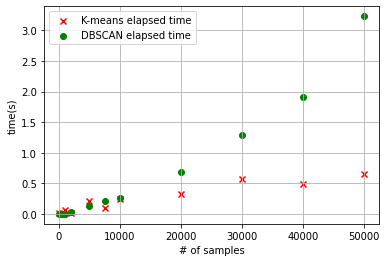

In [11]:
# DBSCAN 알고리즘과 K-means 알고리즘의 시간을 비교하는 코드 
import time

n_samples= [100, 500, 1000, 2000, 5000, 7500, 10000, 20000, 30000, 40000, 50000]

kmeans_time = []
dbscan_time = []
x = []
for n_sample in n_samples:
    dummy_circle, dummy_labels = make_circles(n_samples=n_sample, factor=0.5, noise=0.01) # 원형의 분포를 가지는 데이터 생성

    # K-means 시간을 측정
    kmeans_start = time.time()
    circle_kmeans = KMeans(n_clusters=2)
    circle_kmeans.fit(dummy_circle)
    kmeans_end = time.time()

    # DBSCAN 시간을 측정
    dbscan_start = time.time()
    epsilon, minPts = 0.2, 3
    circle_dbscan = DBSCAN(eps=epsilon, min_samples=minPts)
    circle_dbscan.fit(dummy_circle)
    dbscan_end = time.time()

    x.append(n_sample)
    kmeans_time.append(kmeans_end-kmeans_start)
    dbscan_time.append(dbscan_end-dbscan_start)
    print("# of samples: {} / Elapsed time of K-means: {:.5f}s / DBSCAN: {:.5f}s".format(n_sample, kmeans_end-kmeans_start, dbscan_end-dbscan_start))

# K-means와 DBSCAN의 소요 시간 그래프화
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.scatter(x, kmeans_time, c='red', marker='x', label='K-means elapsed time')
ax.scatter(x, dbscan_time, c='green', label='DBSCAN elapsed time')
ax.set_xlabel('# of samples')
ax.set_ylabel('time(s)')
ax.legend()
ax.grid()

위에서 알 수 있듯이, 데이터의 수가 적을 때는 K-means 알고리즘의 수행 시간이 DBSCAN에 비해 더 길었으나, 군집화할 데이터의 수가 많아질수록 DBSCAN의 알고리즘 수행 시간이 급격하게 늘어나게 됩니다. 또한 클러스터의 수를 지정해 줄 필요가 없으나 데이터 분포에 맞는 epsilon과 minPts의 값을 지정해 주어야 한다는 점 등이 단점으로 여겨지네요.

## 6-5. 차원 축소(1) PCA

비지도학습의 대표적인 방법 중 하나로 주성분분석(PCA)이라는 차원 축소(Dimensionality reduction) 알고리즘이 있어요. 비지도학습의 방법으로 차원 축소를 왜 사용하는지에 대해서도 한번 알아볼 필요가 있겠죠?

예전에는 모르는 것이 있을 때, 필요한 정보를 찾을 수 있는 공간이 한정되어 있었어요. 하지만 요즘에는 포털 사이트에서 궁금한 점을 검색만 하면 모르는 내용을 바로 찾아볼 수 있는 정도를 넘어서, 개인의 성향에 맞추어 내가 궁금하겠다 싶은 내용을 메인에 띄워주는 추천 알고리즘이 적용된 서비스들도 많습니다. 괜히 인터넷을 정보의 바다라고 부르는 게 아니에요. 때로는 불필요한 정보들을 너무 많이 제공하기도 해서, 내가 원하는 정보와 원치 않는 정보를 분류하기 힘든 경우도 많아요.

차원 축소는 이처럼 수많은 정보 속에서 우리에게 더 중요한 요소가 무엇인지를 알게 해주는 방법이랍니다. 특히 비지도학습에서는 데이터를 나타내는 여러 특징(feature)들 중에서 어떤 특징이 가장 그 데이터를 잘 표현(represent) 하는지 알게 해주는 특징 추출(feature extraction)의 용도로 사용돼요. 그러면 차원 축소 방법 중에서도 가장 널리 쓰이는 PCA에 대해 조금 더 자세히 알아볼까요?

PCA를 제대로 이해하기 위해서는 선형대수라는 수학분야의 기초지식이 필요합니다. 수학적인 설명을 하자면 아래와 같습니다.

PCA는 데이터 분포의 주성분을 찾아주는 방법이에요. 여기서 주성분이라는 의미는 데이터의 분산이 가장 큰 방향벡터를 의미해요.
PCA는 데이터들의 분산을 최대로 보존하면서, 서로 직교(orthogonal)하는 기저(basis, 분산이 큰 방향벡터의 축)들을 찾아 고차원 공간을 저차원 공간으로 사영(projection)해요.
또한 PCA에서는 기존 feature 중 중요한 것을 선택하는 방식이 아닌 기존의 feature를 선형 결합(linear combination)하는 방식을 사용하고 있어요.

여기서 직교(orthogonal), 기저(basis), 사영(projection), 선형결합(linear combination) 이라는 수학 용어가 등장하는데요,

그림으로 보면서 조금 더 쉽게 그 의미를 직관적으로 파악해 봅시다.

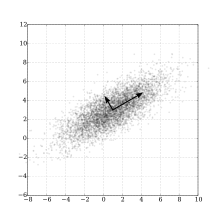

[타원 데이터 분포에서 주성분 분석을 통한 basis(출처: https://en.wikipedia.org/wiki/Principal_component_analysis)]

데이터들을 X-Y 좌표축 상에 표현하면 데이터가 X 성분과 Y 성분으로 나뉘어 표현된다는 것을 알 수 있습니다. 예를 들어 (1, 1)이라면 X 방향으로 1만큼, Y 방향으로 1만큼의 위치에 존재하는 데이터라는 뜻이죠.
만약에 위 그림에서 보이는 우상향 방향의 긴 화살표와 좌상향 방향의 짧은 화살표 방향을 좌표축으로 삼으면 어떨까요? 각각을 새로운 X', Y' 좌표축이라고 한다면 말이죠. 아마 좌표값은 다르겠지만 얼마든지 같은 데이터를 새로운 좌표계로 변환해서 표현할 수 있겠죠? 이렇게 새로운 좌표계 역할을 할 수 있는 벡터의 모음을 기저(basis)라고 합니다. 그래서 우리가 사용하는 좌표값이란, 실은 기저의 선형결합으로 표현된 것입니다. (1, 1)이란 X방향 1, Y방향 1의 선형결합일 뿐이죠.

위 그림과 같이 타원형 분포로 되어있는 데이터들이 있을 때, 차원의 수는 줄이면서 데이터 분포의 분산을 최대한 유지하기 위해 가장 분산이 긴 축을 첫 기저로 잡고, 그 기저에 직교하는 축 중 가장 분산이 큰 값을 다음 기저로 잡게 돼요. 이 과정을 반복하게 되면 차원의 수를 최대로 줄이면서 데이터 분포의 분산을 그대로 유지할 수 있답니다. 이것을 차원 축소라고 하는데요, 위 그림에서라면 여러 개의 차원으로 구성된 데이터들을 2개의 차원으로 축소해도 정보의 손실을 최소화하여 데이터의 분포를 충분히 표현할 수 있다는 의미예요.



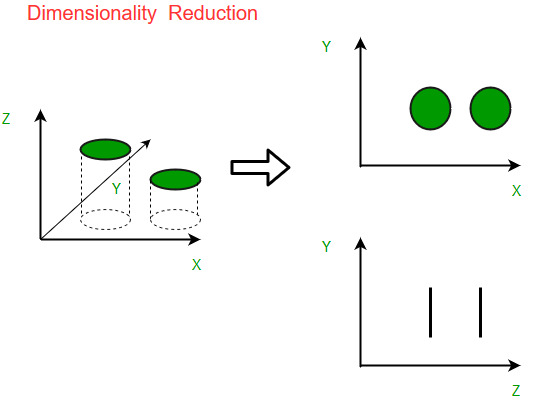

[출처 : https://www.geeksforgeeks.org/dimensionality-reduction/]

여기서 차원 축소의 핵심 개념으로 사영(projection)이라는 용어가 등장하는데, 이를 설명하기 위해 위 그림을 참고해 주세요.

X-Y-Z 좌표축상에 존재하는 데이터를 X-Y, Y-Z 좌표축에 사영(projection) 했다는 것은 각각 Z, X 좌표축을 무시했다는 뜻이 됩니다. 그러면 무시한 데이터만큼의 정보손실이 일어나겠죠. 위 그림의 경우 원본 데이터의 특성을 상대적으로 잘 살리면서 차원을 1개 줄인 것은 X-Y일까요? Y-Z일까요? 아무래도 X-Y이겠죠? 그렇다면 Z축 방향의 정보는 상대적으로 덜 중요하다.(수학적으로는 Z축 방향의 분산이 작다.)고 할 수 있습니다.

PCA는 차원축소를 시도하되, 주어진 좌표축 방향이 아니라, 가장 분산이 길게 나오는 기저(basis) 방향을 찾아서 그 방향의 기저만 남기고, 덜 중요한 기저 방향을 삭제하는 방식으로 진행됩니다. 이렇게 찾은 가장 중요한 기저를 주성분(Principal Component) 방향, 또는 pc축이라고 합니다.

그렇다면 PCA를 실제 데이터셋에 적용해보고 차원 축소를 적용한 이후 분류하는 예제를 다음과 같은 코드를 통해 확인해볼까요?

### 1. 데이터 개요

In [12]:
# 차원 축소 예제: 유방암 데이터셋
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# 데이터 로드
cancer=load_breast_cancer()

# y=0(Malignant:악성 종양), y=1(Benign:양성 종양)
cancer_X, cancer_y= cancer.data, cancer['target']
train_X, test_X, train_y, test_y = train_test_split(cancer_X, cancer_y, test_size=0.1, random_state=10) # train 데이터셋과 test 데이터셋으로 나눔
print(f"전체 검사자 수: {len(cancer_X)}")
print(f"Train dataset에 사용되는 검사자 수: {len(train_X)}")
print(f"Test dataset에 사용되는 검사자 수: {len(test_X)}")
cancer_df = pd.DataFrame(cancer_X, columns=cancer['feature_names'])
cancer_df.head()

전체 검사자 수: 569
Train dataset에 사용되는 검사자 수: 512
Test dataset에 사용되는 검사자 수: 57


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


차원 축소를 위해 scikit-learn 라이브러리에서 불러온 유방암 데이터셋이에요. 총 30개의 feature로 구성이 되어 있고 데이터의 수는 569 rows, 각각의 row에 해당 환자가 악성 종양(malignant, 0)을 가지고 있는지, 양성 종양(benign, 1)을 가지고 있는지 라벨링이 되어 있어요.

이번에는 유방암 데이터셋을 훈련, 테스트 데이터셋으로 나누고, 훈련 데이터셋과 테스트 데이터셋 각각에 PCA를 적용해 볼 거예요. 그리고 나서 차원 축소를 적용하지 않은 original data와 PCA를 적용한 data를 이용하여 SVM classifier를 훈련시킨 후, 각각의 테스트 데이터셋을 통해 정확도를 확인하는 코드를 직접 실행해 봄으로써 PCA가 어떤 효과를 가져다주는지 확인해봐요.

### 2. 유방암 데이터셋에 PCA 알고리즘 적용 예제

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.metrics import accuracy_score
from collections import Counter

# color dictionary
color_dict = {0: 'red', 1: 'blue', 2:'red', 3:'blue'}
target_dict = {0: 'malignant_train', 1: 'benign_train', 2: 'malignant_test', 3:'benign_test'}

#Train data에 PCA 알고리즘 적용

scaler = StandardScaler() 
train_X_ = scaler.fit_transform(train_X) # 불러온 데이터에 대한 정규화 -> 각 column의 range of value가 전부 다르기 때문에 정규화를 진행해 주어야 합니다.
train_df = pd.DataFrame(train_X_, columns=cancer['feature_names'])
pca = PCA(n_components=2) # 주성분의 수를 2개, 즉 기저가 되는 방향벡터를 2개로 하는 PCA 알고리즘 수행
pc = pca.fit_transform(train_df)

여기서 StandScaler().fit_transform() 과정을 수행하는 이유는 각 열마다의 값의 범위가 전부 달라서 그렇습니다. 예를 들어, 첫 번째와 두 번째 열 데이터인 'mean radius'와 'mean texture'의 범위는 다른데, 두 값이 전부 5라는 값을 가진다고 해서 같은 영향을 준다고 취급하면 안 되거든요.

In [14]:
#Test data에 PCA 알고리즘 적용
test_X_ = scaler.fit_transform(test_X) # normalization
test_df = pd.DataFrame(test_X_, columns=cancer['feature_names'])
pc_test = pca.transform(test_df) # pca_transform(test_df)

In [15]:
# 훈련한 classifier의 decision boundary를 그리는 함수
def plot_decision_boundary(X, clf, ax): 
    h = .02  # step size in the mesh
    # create a mesh to plot in
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    ax.contour(xx, yy, Z, cmap='Blues')

# PCA를 적용한 train data의 classifier 훈련: classfier로 Support Vector Machine(SVM) 사용
clf = svm.SVC(kernel = 'rbf', gamma=0.5, C=0.8) # 여기서는 classifier로 SVM을 사용한다는 정도만 알아둡시다!
clf.fit(pc, train_y) # train data로 classifier 훈련

# PCA를 적용하지 않은 original data의 SVM 훈련
clf_orig = svm.SVC(kernel = 'rbf', gamma=0.5, C=0.8) # 여기서는 classifier로 SVM을 사용한다는 정도만 알아둡시다!
clf_orig.fit(train_df, train_y)

SVC(C=0.8, gamma=0.5)

여기서는 서포트 벡터 머신 분류기(SVM classifier)를 훈련시켜 줍니다. 이 SVM classifier는 주성분(PC)을 기반으로 해당 점이 양성인지 악성인지를 구분해 주는 결정 경계선(decision boundary)에 해당하는데, train data에 맞게 경계선이 그어질 수 있도록 이를 훈련시키는 단계에 해당합니다. SVM에 대한 자세한 내용은 여기를 참고해 주세요.

PCA 분석을 사용한 Test dataset accuracy: 54명/57명 => 0.947
PCA를 적용하지 않은 Test dataset accuracy: 43명/57명 => 0.754


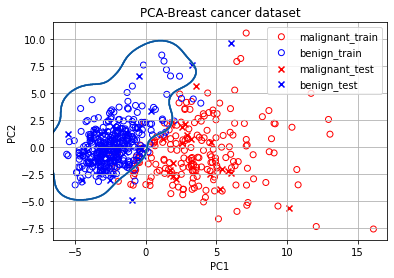

In [16]:
# 캔버스 도식
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# malignant와 benign의 SVM decision boundary 그리기
plot_decision_boundary(pc, clf, ax)

#Train data 도식
for cluster in range(2):
    sub_cancer_points = pc[train_y == cluster]
    ax.scatter(sub_cancer_points[:, 0], sub_cancer_points[:, 1], edgecolor=color_dict[cluster], c='none', label=target_dict[cluster])
#Test data 도식
for cluster in range(2):
    sub_cancer_points = pc_test[test_y == cluster]
    ax.scatter(sub_cancer_points[:, 0], sub_cancer_points[:, 1], marker= 'x', c=color_dict[cluster+2], label=target_dict[cluster+2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('PCA-Breast cancer dataset')
ax.legend()
ax.grid()

# Scoring
pca_test_accuracy_dict = Counter(clf.predict(pc_test) == test_y)
orig_test_accuracy_dict = Counter(clf_orig.predict(test_df) == test_y)

print("PCA 분석을 사용한 Test dataset accuracy: {}명/{}명 => {:.3f}".format(pca_test_accuracy_dict[True], sum(pca_test_accuracy_dict.values()), clf.score(pc_test, test_y)))
print("PCA를 적용하지 않은 Test dataset accuracy: {}명/{}명 => {:.3f}".format(orig_test_accuracy_dict[True], sum(orig_test_accuracy_dict.values()), clf_orig.score(test_df, test_y)))

In [17]:
# Q. 위 코드를 적절히 수정하여 PCA의 주성분을 10으로 만든 뒤 이 코드 블럭을 실행하여 성능을 비교해보세요.
# Scoring
pca_test_accuracy_dict = Counter(clf.predict(pc_test) == test_y)
orig_test_accuracy_dict = Counter(clf_orig.predict(test_df) == test_y)

print("PCA 분석을 사용한 Test dataset accuracy: {}명/{}명 => {:.3f}".format(pca_test_accuracy_dict[True], sum(pca_test_accuracy_dict.values()), clf.score(pc_test, test_y)))
print("PCA를 적용하지 않은 Test dataset accuracy: {}명/{}명 => {:.3f}".format(orig_test_accuracy_dict[True], sum(orig_test_accuracy_dict.values()), clf_orig.score(test_df, test_y)))

PCA 분석을 사용한 Test dataset accuracy: 54명/57명 => 0.947
PCA를 적용하지 않은 Test dataset accuracy: 43명/57명 => 0.754


굉장히 놀랍지 않나요?
단 2개의 주성분 feature 만으로 분류한 PCA classifier의 정확도가 30개의 feature를 모두 사용한 original classifier보다 훨씬 높은 분류 정확도를 보여주네요. 모든 feature를 이용한 방식의 정확도가 더 낮은 이유 중 하나는 바로 제공된 30개의 feature 중 종양의 악성/양성과 관련 없는 것이 존재해서 해당 feature가 오히려 분류를 방해했기 때문이에요.
그래서 feature의 수가 적더라도, 악성/양성과 관련이 깊은 중요한 feature만을 이용한 분류의 정확도가 훨씬 더 높을 수 있는 거죠. 위 유방암 데이터셋에서 살펴보았듯이, PCA는 각 feature 간 상관관계가 있고 이를 추릴 필요가 있을 때 유용하게 사용되는 비지도학습 방법 중 하나입니다.

## 6-6. 차원 축소(2) T-SNE
---
PCA의 차원축소 마법에 대해서는 모두 이해하셨나요?

이번에는 T-SNE(T-Stochastic Neighbor Embedding) 라는, 시각화에 많이 쓰이는 알고리즘을 배워보려 합니다.

우리의 현실 세계는 3차원이며, 우리는 그 이상의 차원을 표현하거나 눈으로 보고 인지하기 어렵습니다. 이런 이유로, 우리는 고차원의 데이터를 1~3차원으로 불러들여와야 비로소 데이터를 시각적으로 이해할 수 있게 됩니다.

이 시각화도 PCA로 다 되는 거 아니야? 라고 생각하실 수 있지만, 차원축소를 하는 목적에 따라 데이터의 어떤 정보를 보존할 것이냐에 따라 적합한 알고리즘이 따로 있습니다.

예를 들어, PCA는 주로 선형적인 데이터의 분포(키와 몸무게 등)를 가지고 있을 때, 정보가 가장 잘 보존됩니다.

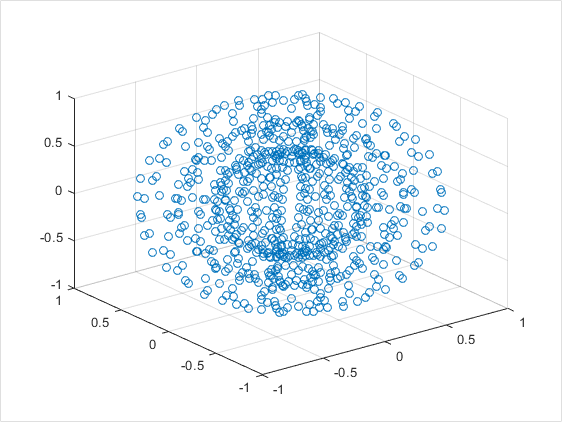

위의 이미지처럼 방사형적, 비선형적 데이터에서는 많은 정보량을 담기 위한 주성분(Principal Component)으로 잡을 선형적인 축을 찾기 어렵습니다. 따라서, 위 데이터를 PCA를 이용해 2차원으로 표현한다면, 멀리 있는 데이터가 가까이 있도록 차원축소가 이루어질 것입니다. 시각화하여 데이터를 이해한다는 목적과는 잘 맞지 않는 것이죠.

우리가 배워볼 T-SNE는 기존 차원의 공간에서 가까운 점들은, 차원축소된 공간에서도 여전히 가깝게 유지되는 것을 목표로 하고 있습니다.
이 특징 덕분에, 이후 실습에서 MNIST의 784차원의 숫자 이미지를 2차원으로 시각화하여도, 같은 숫자의 이미지끼리 유사한 거리에 놓이는 것을 확인할 수 있을 겁니다.

즉, PCA는 데이터가 가진 고유한 물리적 정보량을 보존하는데 주력하지만, T-SNE는 고유한 물리적 정보량보다는 데이터들 간의 상대적 거리를 보존하는데 주력합니다.

그럼 T-SNE의 시각화 특징을 PCA와 비교하여 살펴보고자 합니다.

## 1. 사이킷런(scikit-learn)에서 MNIST 데이터 불러오기
---
실습에 사용하기 위한 MNIST 데이터셋을 불러오도록 하겠습니다.

이를 위해 먼저 클라우드에 준비된 데이터를 연결합니다.

```bash
mkdir -p ~/aiffel/unsupervised/data
ln -s ~/data/mnist_784.arff ~/aiffel/unsupervised/data
```

MNIST 데이터를 불러옵니다.

In [ ]:
# from scipy.io import arff
# import pandas as pd
# import os

# # 784 pixel로 이뤄진 mnist 이미지 데이터 호출
# path = os.getenv('HOME')+'/aiffel/unsupervised/data/mnist_784.arff'
# mnist = arff.loadarff(path)

사용하기 쉽도록 판다스(Pandas) 데이터프레임으로 만들어 주겠습니다.

In [ ]:
# df = pd.DataFrame(mnist[0])
# df['label'] = df['class'].apply(lambda i : str(i)[2])

# n_image = mnist[0].shape[0]
# pixel_columns = list(df.columns[:-2])

In [ ]:
from sklearn.datasets import fetch_openml
import pandas as pd

# MNIST 데이터 불러오기
mnist = fetch_openml('mnist_784', version=1)

# DataFrame으로 변환
df = pd.DataFrame(mnist.data)
df['label'] = mnist.target.astype(int)

n_image = df.shape[0]
pixel_columns = list(df.columns[:-1])


7만 개의 이미지 데이터 중 1만 개를 랜덤샘플링 합니다.

In [ ]:
import numpy as np

# 결과가 재생산 가능하도록 랜덤 시드를 지정합니다.
np.random.seed(30)

# 이미지 데이터의 순서를 랜덤으로 뒤바꾼(permutation) 배열을 담습니다.
rndperm = np.random.permutation(n_image)

# 랜덤으로 섞은 이미지 중 10,000개를 뽑고, df_subset에 담습니다.
n_image_sample = 10000
random_idx = rndperm[:n_image_sample]
df_subset = df.loc[random_idx,:].copy()
df_subset.shape

판다스 데이터프레임에 올린 데이터셋을 matplot 라이브러리를 사용해서 확인해 봅시다.

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

plt.gray()
fig = plt.figure( figsize=(10,6) )
n_img_sample = 15
width,height = 28,28

# 15개 샘플을 시각화해 봅니다. 
for i in range(0,n_img_sample):
    row = df_subset.iloc[i]
    ax = fig.add_subplot(3,5,i+1, title=f"Digit: {row['label']}")
    ax.matshow(row[pixel_columns]
               .values.reshape((width,height))
               .astype(float))

plt.show()

### 2. PCA 를 이용한 MNIST 차원축소
---
사이킷런에서 제공하는 PCA 모듈을 사용하여 차원을 축소할 수 있습니다.

In [ ]:
from sklearn.decomposition import PCA

print(f"df_subset의 shape: {df_subset.shape}")

n_dimension = 2 # 축소시킬 목표 차원의 수
pca = PCA(n_components=n_dimension)

pca_result = pca.fit_transform(df_subset[pixel_columns].values) # 차원을 축소한 결과
df_subset['pca-one'] = pca_result[:,0] # 축소한 결과의 첫 번째 차원 값
df_subset['pca-two'] = pca_result[:,1] # 축소한 결과의 두 번째 차원 값

print(f"pca_result의 shape: {pca_result.shape}")

Principal Component 별로 보존하는 정보량을 확인합니다

차원을 축소한 댓가로 차원의 정보량 중 일부만 남게 됩니다.
sklearn의 PCA 모듈은 PC 축 마다 보존하는 정보량의 비율을 제시해 줍니다.

In [ ]:
print(f"pca-1: {round(pca.explained_variance_ratio_[0],3)*100}%")
print(f"pca-2: {round(pca.explained_variance_ratio_[1],3)*100}%")

784차원을 2차원으로 차원축소 하였을 때, 정보량이 전체의 16.9%가 남게 됩니다.

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,   # 2개의 PC축만 남은 데이터프레임 df_subset 을 시각화해 보자.
    legend="full",
    alpha=0.4
)

PCA로 784차원을 2차원으로 줄인 결과 벡터를 Scatter 그래프로 그려보았습니다
같거나 모양이 비슷한 숫자 이미지가 유사한 벡터값을 갖는것을 색상으로 확인할 수 있습니다.

### 3. T-SNE 를 이용한 MNIST 차원축소
---
이번에는 사이킷런에서 제공하는 T-SNE 모듈을 사용하여 동일한 1만 개의 이미지 데이터의 차원을 축소해 봅시다.

- scikit-learn 공식 문서: TSNE 모듈  https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE

  
(주의) 아래 코드의 tsne.fit_transform() 은 PCA보다는 확실히 시간이 많이 걸립니다. 몇분 정도 여유를 가지고 기다려 주세요. 🍵

In [ ]:
from sklearn.manifold import TSNE

print(f"df_subset의 shape: {df_subset.shape}")

data_subset = df_subset[pixel_columns].values
n_dimension = 2
tsne = TSNE(n_components=n_dimension)
tsne_results = tsne.fit_transform(data_subset)

print(f"tsne_results의 shape: {tsne_results.shape}")

In [ ]:
# tsne 결과를 차원별로 추가합니다.
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]

# 시각화해 봅니다.
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3
)

어떤가요? PCA로 축소해 시각화한 결과와 뚜렷한 차이점이 확인되나요?

위에서 언급한 내용을 다시 한번 상기해 봅시다.

우리가 배워볼 T-SNE는 기존 차원의 공간에서 가까운 점들은, 차원축소된 공간에서도 여전히 가깝게 유지되는 것을 목표로 하고 있습니다. 이 특징 덕분에, 이후 실습에서 MNIST의 784차원의 숫자 이미지를 2차원으로 시각화하여도, 같은 숫자의 이미지끼리 유사한 거리에 놓이는 것을 확인할 수 있을 겁니다.

이것은 PCA와 구분되는 T-SNE의 뚜렷한 특징입니다. PCA를 통해 차원축소를 하면서 발생하는 정보 손실의 과정 중에는 두 점 사이의 거리라는 중요한 정보가 함께 손실되는 측면이 있습니다. 만약 두 점의 거리가 PCA의 PC축을 따라 발생한 거리라면 유지가 되겠지만, 그렇지 않다면 PCA 과정을 통해 두 점 사이의 거리가 소거되고, 실제로는 먼 거리의 점들이 아주 가까운 점으로 투영될 가능성이 있습니다.

그 결과로 이전 스텝에서 PCA의 시각화 화면을 보면 다른 숫자들 사이의 경계가 불분명할 정도로 분포가 뒤섞여 있는 것을 확인할 수 있습니다.

반면에, T-SNE에서는 고차원에서 먼 거리의 두 점은 저차원에서도 먼 거리에 있어야 합니다. 그러므로 결과적으로 T-SNE를 시각화하면 숫자들 사이의 경계가 뚜렷이 나타나는 장점이 있습니다. 위에서 T-SNE를 훈련시켰을 때 label 정보를 전혀 참조하지 않고 df_subset[pixel_columns] 정보만 참고하여 얻은 결과라는 점에 주목해 주세요. 그래서 T-SNE는 분류기의 Feature Extractor 모델이 카테고리 간 분류 경계선을 뚜렷하게 유지하고 있는지를 확인하는 용도로 자주 쓰입니다.

그러면 T-SNE는 PCA보다 우월한 차원축소 기법일까요? 그렇지 않습니다.

T-SNE의 두 차원은 물리적 의미를 가지지 않습니다. PCA는 정보 손실을 최소화하려는 관점을 가지고 있으므로, 그 결과 추출된 PC축은 주성분이라는 물리적 의미를 유지하고 있으며, 공분산을 통해 원본 데이터를 일정 부분 복원할 수 있는 가능성을 가지고 있습니다. 그러나 T-SNE는 정보 손실량에 주목하지 않으며, 그 결과 저차원 축이 아무런 물리적 의미를 가지지 못합니다. 오직 시각화에만 유리할 뿐입니다.

## 6-7. 정리 및 요약

#### 종합 퀴즈
---
지금까지 비지도학습에 대표적으로 사용되는 네 가지 알고리즘에 대해 자세히 살펴봤어요. 물론 이외에도 딥러닝을 이용한 생성 모델(대표적으로 GAN) 등 다양한 방법들이 비지도학습의 축을 담당하고 있습니다. 그럼 마지막으로 이번 노드에서 다루어 본 알고리즘들의 특징을 정리하고 비교해 보면서 마무리할까 해요.

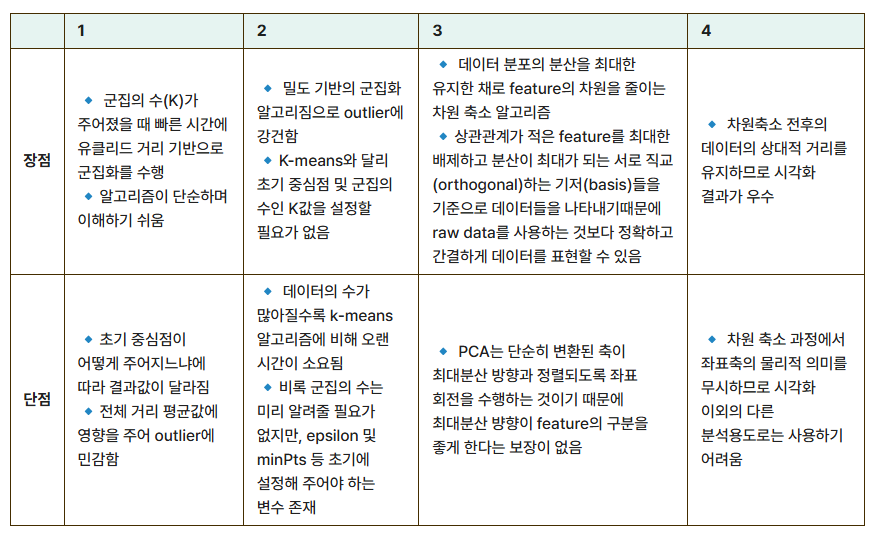

Q. 위 표의 1, 2, 3, 4 번에 해당하는 비지도학습 알고리즘은 각각 무엇일까요?
